## NCX channel

In [1]:
import random as random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import pandas as pd

### Notations

- **$E_1$ :** States with binding sites orientewd to the cytoplasmic sides
- **$E_2$ :** States with binding sites orientewd to the extracellular sides

------------

- **$E_{1}3N_{i}$ :** States with binding sites orientewd to the cytoplasmic sides containing 3 Na+ ions
- **$E_{0}3N$ :** States with binding sites occluded with 3 Na+ ions 
- **$E_{2}3N_{0}$ :** States with binding sites orientewd to the extracellular sides with 3 Na+ ions

------------

- **$E_{1}C_{1}$ :** States with binding sites orientewd to the cytoplasmic sides containing 1 Ca++ ion
- **$E_{0}C$ :** States with binding sites occluded with 1 Ca++ ion
- **$E_{2}C_{0}$ :** States with binding sites orientewd to the extracellular sides with 1 Ca++ ion



### Constants

- **Name** : $\gamma$ = 0.02
- **Membrane Potential** : $Em =... $
- **Name** : $Kem = exp{(0.5\times(1-\gamma)\times Em \times \frac{F}{RT}}) = ....$

-------------

- **Rate Constan** : $k_{1} = 10^{4} \times Kem$
- **Rate Constan** : $k_{2} = F_{3no} \times \frac{10^{4}}{Kem}$
- **Rate Constan** : $k_{3} = F_{co} \times 5.17 \times 10^{4} \times Kem$
- **Rate Constan** : $k_{4} = 5.17 \times 10^{4}$
- **Rate Constan** : $k_{5} = 5.17 \times 10^{4}$
- **Rate Constan** : $k_{6} = F_{ci} \times 5.17 \times 10^{4} $
- **Rate Constan** : $k_{7} = F_{3ni} \times 1.84 \times 10^{4}$
- **Rate Constan** : $k_{8} = 1.84 \times 10^{4} \times$

-------------
- **Rate Constan** : $k_{bak} = 0.12 $
- **Rate Constan** : $k_{1} = 0.8$



In [30]:
k_oi=0.5
k_io=0.3
k_co=0.6
k_oc=0.9
k_ic=0.72
k_ci=0.8
dt=0.01

In [54]:
data = [{'C': 1.000, 'I': 0.000, 'O': 0.000}]
N = 100
T = 100
sn = "O"
for n in range(N):
    ss = []
    for t in range(T):
        r=random.uniform(0,1)
        
        if sn == "O":
            if 0 < dt*r < k_oc*dt:
                s= "C"
            elif (k_oc*dt) < dt*r < (k_oc*dt+k_oi*dt):
                s= "I"
            elif (k_oc*dt+k_oi*dt) < dt*r < 1:
                s= "O"
                
        if sn == "I":
            if 0 < dt*r < k_ic*dt:
                s= "C"
            elif (k_ic*dt) < dt*r < (k_ic*dt+k_io*dt):
                s= "O"
            elif (k_ic*dt+k_io*dt) < dt*r < 1:
                s= "I"
                
        if sn == "C":
            if 0 < dt*r < k_co*dt:
                s= "O"
            elif (k_co*dt < dt*r)< (k_co*dt+k_ci*dt):
                s= "I"
            elif (k_co*dt + k_ci*dt)< dt*r<1:
                s= "C"
                
                
                
        ss.append(s)
        sn = s
    data.append({"C": ss.count("C")/float(T),\
                 "I":ss.count("I")/float(T),\
                 "O":ss.count("O")/float(T)})
        #print(s)    

In [55]:
data[0:5]

[{'C': 1.0, 'I': 0.0, 'O': 0.0},
 {'C': 0.66, 'I': 0.03, 'O': 0.31},
 {'C': 0.56, 'I': 0.07, 'O': 0.37},
 {'C': 0.63, 'I': 0.04, 'O': 0.33},
 {'C': 0.6, 'I': 0.06, 'O': 0.34}]

In [56]:
DF = pd.DataFrame(data)
DF.head()

,C,I,O
0,1.00,0.00,0.00
1,0.66,0.03,0.31
2,0.56,0.07,0.37
3,0.63,0.04,0.33
4,0.60,0.06,0.34


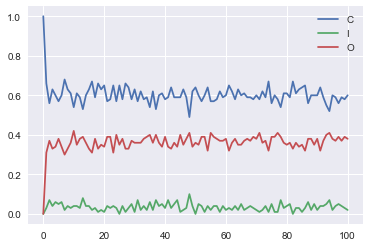

In [57]:
DF.plot()